# Module 12 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [60]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup as soup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


In [61]:
browser = Browser('chrome')

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [62]:
# Visit the website
# https://static.bc-edx.com/data/web/mars_facts/temperature.html
url = "https://static.bc-edx.com/data/web/mars_facts/temperature.html"
browser.visit(url)

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [63]:
# Create a Beautiful Soup Object
html = browser.html
soup = soup(html, 'html.parser')

In [64]:
# Extract all rows of data
all_rows = soup.find_all("tr", class_="data-row")
for row in all_rows:
    print(row)

<tr class="data-row">
<td>2</td>
<td>2012-08-16</td>
<td>10</td>
<td>155</td>
<td>6</td>
<td>-75.0</td>
<td>739.0</td>
</tr>
<tr class="data-row">
<td>13</td>
<td>2012-08-17</td>
<td>11</td>
<td>156</td>
<td>6</td>
<td>-76.0</td>
<td>740.0</td>
</tr>
<tr class="data-row">
<td>24</td>
<td>2012-08-18</td>
<td>12</td>
<td>156</td>
<td>6</td>
<td>-76.0</td>
<td>741.0</td>
</tr>
<tr class="data-row">
<td>35</td>
<td>2012-08-19</td>
<td>13</td>
<td>157</td>
<td>6</td>
<td>-74.0</td>
<td>732.0</td>
</tr>
<tr class="data-row">
<td>46</td>
<td>2012-08-20</td>
<td>14</td>
<td>157</td>
<td>6</td>
<td>-74.0</td>
<td>740.0</td>
</tr>
<tr class="data-row">
<td>57</td>
<td>2012-08-21</td>
<td>15</td>
<td>158</td>
<td>6</td>
<td>-78.0</td>
<td>740.0</td>
</tr>
<tr class="data-row">
<td>68</td>
<td>2012-08-22</td>
<td>16</td>
<td>158</td>
<td>6</td>
<td>-77.0</td>
<td>740.0</td>
</tr>
<tr class="data-row">
<td>79</td>
<td>2012-08-23</td>
<td>17</td>
<td>159</td>
<td>6</td>
<td>-76.0</td>
<td>742.0</td>

In [65]:
header_row = soup.find("tr")
print(header_row)

<tr>
<th>id</th>
<th>terrestrial_date</th>
<th>sol</th>
<th>ls</th>
<th>month</th>
<th>min_temp</th>
<th>pressure</th>
</tr>


In [66]:
header_tags = header_row.find_all("th")
print(header_tags)

[<th>id</th>, <th>terrestrial_date</th>, <th>sol</th>, <th>ls</th>, <th>month</th>, <th>min_temp</th>, <th>pressure</th>]


In [67]:
header_list = []
for id in header_tags:
    header_list.append(id.text.strip())

print(header_list)

['id', 'terrestrial_date', 'sol', 'ls', 'month', 'min_temp', 'pressure']


### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [68]:
# Create an empty list
data_rows = []
# Loop through the scraped data in all_rows to create a list of rows
for row in all_rows:
    # Find all table data (td) tags within the row
    row_data = row.find_all("td")
    # Extract the text from each table data tag and strip whitespace
    row_values = [data.text.strip() for data in row_data]
    # Append the row values to the data_rows list
    data_rows.append(row_values)

data_rows

[['2', '2012-08-16', '10', '155', '6', '-75.0', '739.0'],
 ['13', '2012-08-17', '11', '156', '6', '-76.0', '740.0'],
 ['24', '2012-08-18', '12', '156', '6', '-76.0', '741.0'],
 ['35', '2012-08-19', '13', '157', '6', '-74.0', '732.0'],
 ['46', '2012-08-20', '14', '157', '6', '-74.0', '740.0'],
 ['57', '2012-08-21', '15', '158', '6', '-78.0', '740.0'],
 ['68', '2012-08-22', '16', '158', '6', '-77.0', '740.0'],
 ['79', '2012-08-23', '17', '159', '6', '-76.0', '742.0'],
 ['112', '2012-08-27', '21', '161', '6', '-74.0', '741.0'],
 ['114', '2012-08-28', '22', '162', '6', '-74.0', '742.0'],
 ['123', '2012-08-29', '23', '162', '6', '-75.0', '741.0'],
 ['134', '2012-08-30', '24', '163', '6', '-75.0', '742.0'],
 ['145', '2012-08-31', '25', '163', '6', '-75.0', '743.0'],
 ['156', '2012-09-01', '26', '164', '6', '-76.0', '745.0'],
 ['163', '2012-09-02', '27', '164', '6', '-75.0', '743.0'],
 ['170', '2012-09-03', '28', '165', '6', '-75.0', '745.0'],
 ['171', '2012-09-04', '29', '166', '6', '-75.0',

In [69]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names
df = pd.DataFrame(data_rows, columns=header_list)

In [70]:
# Confirm DataFrame was created successfully
df

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0
...,...,...,...,...,...,...,...
1862,1889,2018-02-23,1973,133,5,-78.0,730.0
1863,1892,2018-02-24,1974,134,5,-77.0,729.0
1864,1894,2018-02-25,1975,134,5,-76.0,729.0
1865,1893,2018-02-26,1976,135,5,-77.0,728.0


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [71]:
# Examine data type of each column
df.dtypes

id                  object
terrestrial_date    object
sol                 object
ls                  object
month               object
min_temp            object
pressure            object
dtype: object

In [72]:
# Change data types for data analysis
df['terrestrial_date'] = pd.to_datetime(df['terrestrial_date'])
df['sol'] = df['sol'].astype(int)
df['ls'] = df['ls'].astype(int)
df['month'] = df['month'].astype(int)
df['min_temp'] = df['min_temp'].astype(float)
df['pressure'] = df['pressure'].astype(float)


In [73]:
# Confirm type changes were successful by examining data types again
df.dtypes

id                          object
terrestrial_date    datetime64[ns]
sol                          int32
ls                           int32
month                        int32
min_temp                   float64
pressure                   float64
dtype: object

### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [74]:
# 1. How many months are there on Mars?
month_counts = df['month'].value_counts().sort_index()

print(month_counts)

month
1     174
2     178
3     192
4     194
5     149
6     147
7     142
8     141
9     134
10    112
11    138
12    166
Name: count, dtype: int64


In [75]:
# 2. How many Martian days' worth of data are there?
martian_days_total = df['sol'].count()
martian_days_total

1867

In [76]:
# 3. What is the average low temperature by month?
avg_low_temp_per_month = df.groupby('month')['min_temp'].mean()

print("Average low temperature by month:")
print(avg_low_temp_per_month)

Average low temperature by month:
month
1    -77.160920
2    -79.932584
3    -83.307292
4    -82.747423
5    -79.308725
6    -75.299320
7    -72.281690
8    -68.382979
9    -69.171642
10   -71.982143
11   -71.985507
12   -74.451807
Name: min_temp, dtype: float64


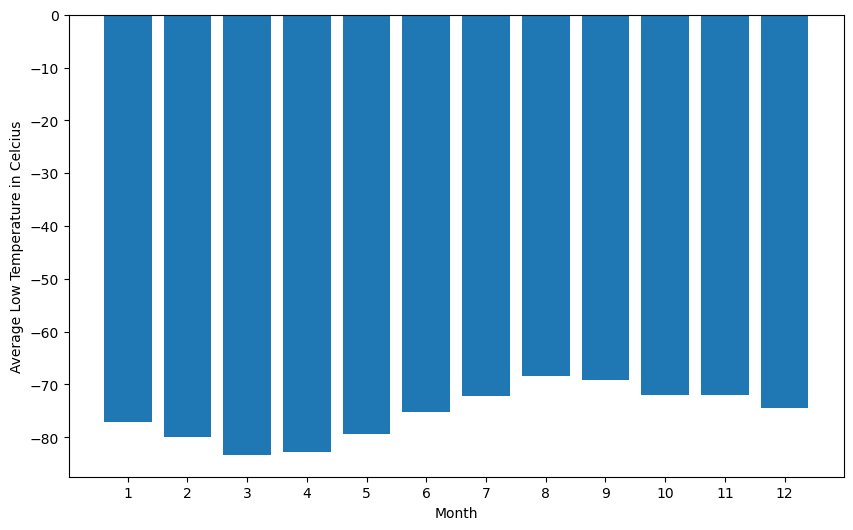

In [77]:
# Plot the average temperature by month
plt.figure(figsize=(10, 6))
plt.bar(avg_low_temp_per_month.index, avg_low_temp_per_month.values)
plt.xlabel('Month')
plt.ylabel('Average Low Temperature in Celcius')
plt.xticks(range(1, 13))
plt.show()

In [78]:
avg_temp_per_month = df.groupby('month')['min_temp'].min()

# Sort the average temperatures per month in descending order by temperature
avg_temp_per_month_sorted = avg_temp_per_month.sort_values(ascending=True)

print(avg_temp_per_month_sorted)

# I tried multiples times, and many different ways to plot in descending order (for both graphs), but I could not manage to do it
# I would appreciate if you commented how on the challenge homework notes.

month
3    -90.0
4    -89.0
2    -86.0
5    -85.0
6    -84.0
1    -82.0
10   -81.0
12   -81.0
7    -78.0
9    -78.0
11   -78.0
8    -75.0
Name: min_temp, dtype: float64


In [79]:
# Extract the index of the sorted Series
avg_temp_per_month_sorted.index


Index([3, 4, 2, 5, 6, 1, 10, 12, 7, 9, 11, 8], dtype='int32', name='month')

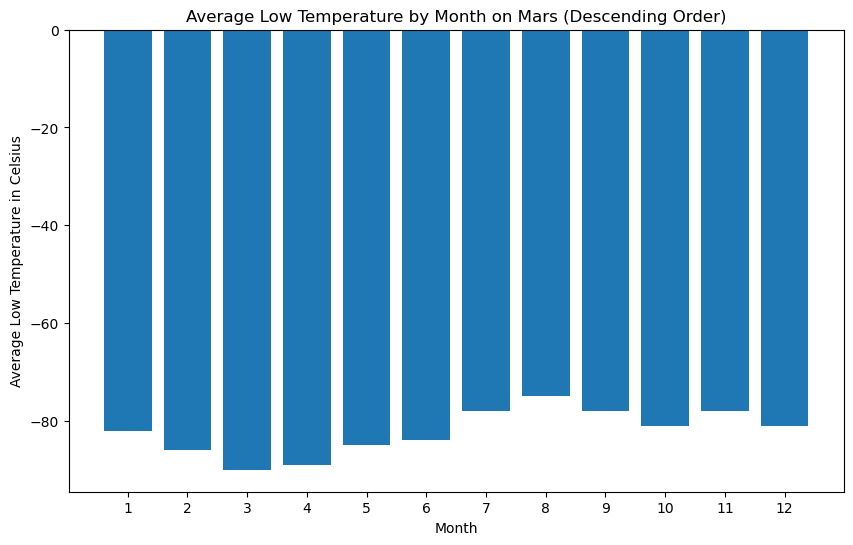

In [80]:
# Identify the coldest and hottest months in Curiosity's location
plt.figure(figsize=(10, 6))
plt.bar(avg_temp_per_month_sorted.index, avg_temp_per_month_sorted.values, tick_label=avg_temp_per_month_sorted.index)
plt.xlabel('Month')
plt.ylabel('Average Low Temperature in Celsius')
plt.title('Average Low Temperature by Month on Mars (Descending Order)')
plt.xticks(avg_temp_per_month_sorted.index)  # Using the index would make sense to me (even in the plt bar x axis)
plt.show()

In [81]:
# 4. Average pressure by Martian month
avg_pressure_by_month = df.groupby('month')['pressure'].mean()
avg_pressure_by_month


month
1     862.488506
2     889.455056
3     877.322917
4     806.329897
5     748.557047
6     745.054422
7     795.105634
8     873.829787
9     913.305970
10    887.312500
11    857.014493
12    842.156627
Name: pressure, dtype: float64

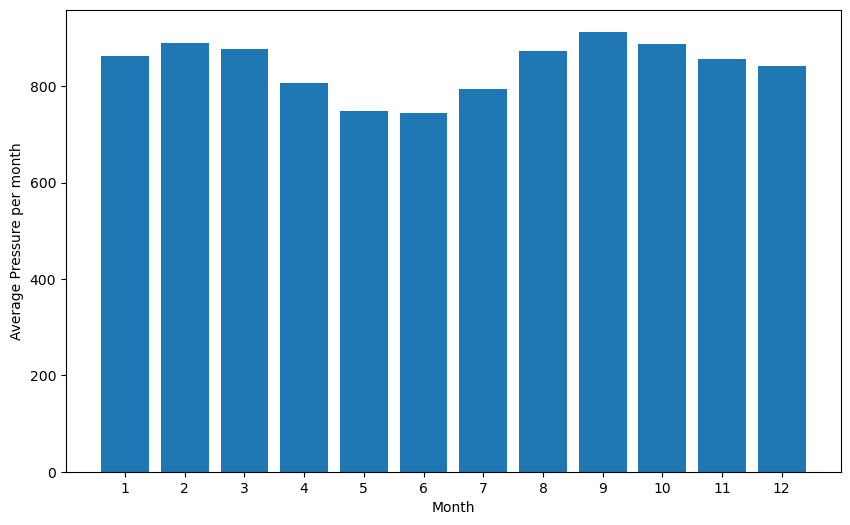

In [82]:
# Plot the average pressure by month
plt.figure(figsize=(10, 6))
plt.bar(avg_pressure_by_month.index, avg_pressure_by_month.values)
plt.xlabel('Month')
plt.ylabel('Average Pressure per month')
plt.xticks(range(1, 13))
plt.show()

In [84]:
# 5. How many terrestrial (earth) days are there in a Martian year?
# We need to consider the ls (solar longitude). When it starts and when it ends, and then count the terrestrial_days within that change.
# # Find the first ls value in the table
# first_ls_value = df['ls'].iloc[0]

# # Print the index of the first ls value
# first_ls_index = df[df['ls'] == first_ls_value].index[0]
# print("Index of the first occurrence of ls value", first_ls_value, ":", first_ls_index)

# # Find the index for when the same ls value appears again
# second_ls_index = df[df['ls'] == first_ls_value].index[1]
# print("Index for when the same ls value", first_ls_value, "appears again:", second_ls_index)

# I tried many different ways using the ls values, however, the mars table:
# does not have consecute id's
# does not have consecutive dates
# does not have consecutive ls values (values are missing)
# if in theory I take value 155 and its date, and find the next 155 value and the date, it should give me an 
# estimate of terrestrial days between those 2 values, but it's giving me below 600.

# how do you do this properly? please comment in the notes



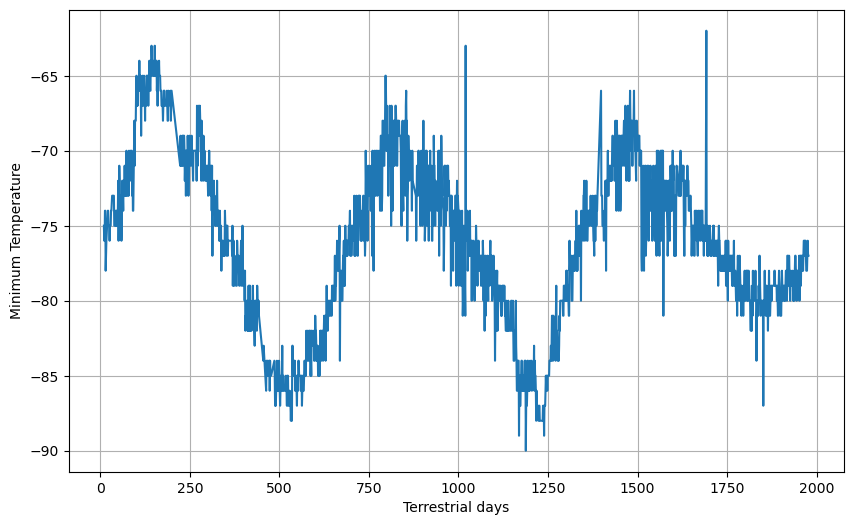

In [85]:
plt.figure(figsize=(10, 6))
plt.plot(df['sol'], df['min_temp'], linestyle='-')
plt.xlabel('Terrestrial days')
plt.ylabel('Minimum Temperature')
plt.grid(True)
plt.show()

On average, the third month has the coldest minimum temperature on Mars, and the eighth month is the warmest. But it is always very cold there in human terms!



Atmospheric pressure is, on average, lowest in the sixth month and highest in the ninth.

The distance from peak to peak is roughly 1425-750, or 675 days. A year on Mars appears to be about 675 days from the plot. Internet search confirms that a Mars year is equivalent to 687 earth days.

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [86]:
# Specify the file path including the file name where you want to save the CSV file
file_path = "C:/Users/Daniel/Documents/Boot Camp/Module 11 challenge/Starter_Code_v1.2.2/Starter_Code/mars_weather_data.csv"

# Write the DataFrame to a CSV file
df.to_csv(file_path, index=False)

print("Data has been successfully written to", file_path)


Data has been successfully written to C:/Users/Daniel/Documents/Boot Camp/Module 11 challenge/Starter_Code_v1.2.2/Starter_Code/mars_weather_data.csv


In [87]:
browser.quit()